Task 1) \
 Create a data frame that contains the following information for each drug: unique
drug identifier in the DrugBank database, name of the drug, its type, description, form in which the drug is given
occurs, indications, mechanism of action and information with which foods the drug is eaten
interacts. \
Solution: There can be many drugbank-id's so we will take the one that is marked as primary.

In [4]:
!pip install pandas
!pip install xmltodict
!pip install scipy

In [5]:
import pandas as pd
import xmltodict
from IPython.display import display
import os

file_path = "drugbank_partial.xml"

with open(file_path, "r", encoding="utf-8") as file:
    data_dict = xmltodict.parse(file.read())

drugs = data_dict["drugbank"]["drug"]

def get_id(drug):
    drug_id = None
    if isinstance(drug['drugbank-id'], list):
        for item in drug['drugbank-id']:
            if isinstance(item, dict) and item.get('@primary') == 'true':
                drug_id = item.get('#text')
                break
    elif isinstance(drug['drugbank-id'], dict):
        if drug['drugbank-id'].get('@primary') == 'true':
            drug_id = drug['drugbank-id'].get('#text')
    return drug_id

def get_name(drug):
    return drug.get("name")

def get_type(drug):
    return drug.get("@type")

def get_description(drug):
    return drug.get("description")

def get_dosage_form(drug):
    return drug.get("state")

def get_indication(drug):
    return drug.get("indication")

def get_mechanism_of_action(drug):
    return drug.get("mechanism-of-action")

def get_food_interactions(drug):
    interactions = []
    if not drug.get("food-interactions"):
        return interactions
    for interaction in drug.get("food-interactions").values():
        interactions.append(interaction)
    return interactions

def find_data():
    records = []
    for drug in drugs:
        record = {
            "DrugBank ID": get_id(drug),
            "Name": get_name(drug),
            "Type": get_type(drug),
            "Description": get_description(drug),
            "Dosage Form": get_dosage_form(drug),
            "Indication": get_indication(drug),
            "Mechanism of Action": get_mechanism_of_action(drug),
            "Food Interactions": get_food_interactions(drug)
        }
        records.append(record)
    return records

filtered_df = pd.DataFrame(find_data())

display(filtered_df)

,DrugBank ID,Name,Type,Description,Dosage Form,Indication,Mechanism of Action,Food Interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,[Avoid herbs and supplements with anticoagulan...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,[]
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,[]
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,[]
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,[]
...,...,...,...,...,...,...,...,...
95,DB00104,Octreotide,biotech,Acromegaly is a disorder caused by excess grow...,solid,Octreotide by injection is used for the treatm...,Octreotide binds to somatostatin receptors cou...,[[Take on an empty stomach. The oral capsules ...
96,DB00105,Interferon alfa-2b,biotech,Interferon alpha 2b (human leukocyte clone hif...,liquid,"For the treatment of hairy cell leukemia, mali...",Interferon alpha binds to type I interferon re...,[Avoid alcohol.]
97,DB00106,Abarelix,small molecule,Synthetic decapeptide antagonist to gonadotrop...,solid,For palliative treatment of advanced prostate ...,Abarelix binds to the gonadotropin releasing h...,[]
98,DB00107,Oxytocin,biotech,Sir Henry H. Dale first identified oxytocin an...,liquid,Administration of exogenous oxytocin is indica...,Oxytocin plays a vital role in labour and deli...,[]


Task 2) \
Create a data frame that allows you to search for information about DrugBank ID
all synonyms under which a given drug appears. Write a function that for the given
DrugBank ID will create and draw a synonym graph using the NetworkX library. You should
ensure the readability of the generated drawing. \
Solution: The selected drug will be in the middle of the graph and its synonyms will be connected to it.

In [6]:
!pip install networkx
!pip install matplotlib

Synonyms DataFrame:


,DrugBank ID,Synonyms
0,DB00001,"[[Leu1, Thr2]-63-desulfohirudin, Desulfatohiru..."
1,DB00002,"[Cetuximab, Cétuximab, Cetuximabum]"
2,DB00003,[Deoxyribonuclease (human clone 18-1 protein m...
3,DB00004,"[Denileukin, Denileukin diftitox, Interleukin-..."
4,DB00005,"[Etanercept, etanercept-szzs, etanercept-ykro,..."
...,...,...
95,DB00104,"[Octreotida, Octreotide, Octreotidum, Octrotide]"
96,DB00105,"[Interferon alfa-2b, Interferon alfa-2b (recom..."
97,DB00106,[Abarelix]
98,DB00107,"[Oxitocina, Oxytocin]"


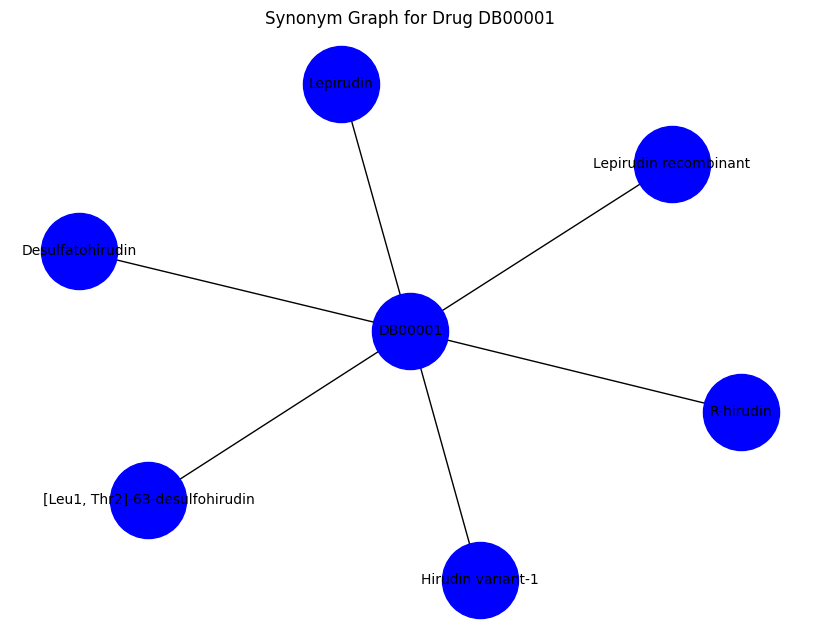

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def get_synonyms(drug):
    synonyms = []
    if "synonyms" in drug and drug["synonyms"]:
        syn_data = drug["synonyms"]
        if "synonym" in syn_data:
            syns = syn_data["synonym"]
            if isinstance(syns, list):
                for syn in syns:
                    if isinstance(syn, dict):
                        text = syn.get("#text", "").strip()
                        if text:
                            synonyms.append(text)
                    elif isinstance(syn, str):
                        synonyms.append(syn.strip())
            elif isinstance(syns, dict):
                text = syns.get("#text", "").strip()
                if text:
                    synonyms.append(text)
            elif isinstance(syns, str):
                synonyms.append(syns.strip())
    return synonyms

def create_synonyms_df():
    records = []
    for drug in drugs:
        drug_id = get_id(drug)
        syns = get_synonyms(drug)
        records.append({"DrugBank ID": drug_id, "Synonyms": syns})
    return pd.DataFrame(records)


# Create the DataFrame of synonyms
synonyms_df = create_synonyms_df()
print("Synonyms DataFrame:")
display(synonyms_df)

def draw_synonym_graph(drugbank_id, synonyms_df):
    record = synonyms_df[synonyms_df["DrugBank ID"] == drugbank_id]
    if record.empty:
        print(f"No drug found with ID {drugbank_id}")
        return
    synonyms = record.iloc[0]["Synonyms"]

    G = nx.Graph()
    G.add_node(drugbank_id)
    for syn in synonyms:
        G.add_node(syn)
        G.add_edge(drugbank_id, syn)

    pos = nx.spring_layout(G)   # Creates the star-like layout
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="blue", node_size=3000, font_size=10)
    plt.title(f"Synonym Graph for Drug {drugbank_id}")
    plt.show()

draw_synonym_graph("DB00001", synonyms_df)

Task 3)\
Create a data frame about pharmaceutical products containing a given drug
(medicinal substance). The frame should contain information about the drug ID, product name,
manufacturer, code in the US national registry (*National Drug Code*), form in which
the product exists, method of application, information about the dose, country and registration agency
product. \
Solution: just parse data.


In [8]:
def get_products(drug):
    products = []
    if "products" in drug and drug["products"]:
        product_data = drug["products"].get("product")
        if product_data:
            if isinstance(product_data, list):
                products = product_data
            elif isinstance(product_data, dict):
                products = [product_data]
    return products

records = []
for drug in drugs:
    drug_id = get_id(drug)
    products = get_products(drug)
    if products is not None:
        for prod in products:
            record = {
                "DrugBank ID": drug_id,
                "Product Name": prod.get("name"),
                "Manufacturer": prod.get("labeller"),
                "National Drug Code": prod.get("ndc-product-code"),
                "Dosage Form": prod.get("dosage-form"),
                "Route of Administration": prod.get("route"),
                "Dosage Information": prod.get("strength"),
                "Country": prod.get("country"),
                "Regulatory Agency": prod.get("source")
            }
            records.append(record)

# Utworzenie DataFrame
df_products = pd.DataFrame(records)
display(df_products)

,DrugBank ID,Product Name,Manufacturer,National Drug Code,Dosage Form,Route of Administration,Dosage Information,Country,Regulatory Agency
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Refludan,Bayer,None,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
...,...,...,...,...,...,...,...,...,...
4579,DB00108,Tysabri,Elan Pharmaceuticals,59075-730,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4580,DB00108,Tysabri,Biogen Inc.,64406-008,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4581,DB00108,Tysabri,Biogen,None,Solution,Intravenous,300 mg / 15 mL,Canada,DPD
4582,DB00108,Tysabri,Biogen Netherlands B.V.,None,"Injection, solution, concentrate",Intravenous,300 mg,EU,EMA


Task 4) \
Create a dataframe containing information about all of everyone's trails
types, i.e. signaling, metabolic, etc., with which any drug interacts.
Provide the total number of these routes. \
Solution: parse data and sum up the number of pathways.

In [9]:
def get_pathways(drug):
    pathways = []
    if isinstance(drug["pathways"], list):
        for pathway in drug["pathways"].values():
            pathways.append(pathway["name"])
    elif isinstance(drug["pathways"], dict):
        pathways.append(drug["pathways"]["pathway"]["name"])
    return pathways

def get_all_pathways():
    no_pathways = 0
    records = []
    for drug in drugs:
        drug_id = get_id(drug)
        pathways = get_pathways(drug)
        no_pathways += len(pathways)
        record = {
            "DrugBank ID": drug_id,
            "Pathways": pathways
        }
        records.append(record)
    return no_pathways, pd.DataFrame(records)

no_pathways, df = get_all_pathways()
print("Total number of pathways:", no_pathways)
display(df)

Total number of pathways: 12


,DrugBank ID,Pathways
0,DB00001,[Lepirudin Action Pathway]
1,DB00002,[Cetuximab Action Pathway]
2,DB00003,[]
3,DB00004,[]
4,DB00005,[]
...,...,...
95,DB00104,[]
96,DB00105,[]
97,DB00106,[]
98,DB00107,[]


Task 5) \
For each signaling/metabolic pathway in the database, provide the drugs that
they interact with it. The results should be presented in the form of a data frame and in
graphic form developed by yourself. An example of such graphics may be a graph
bipartite, where the two types of vertices are signaling pathways and drugs, and individual
edges represent the interaction of a given drug with a given signaling pathway. You should
ensure the readability and attractiveness of the graphic presentation. \
Solution: scan all drugs and their pathways, then create a bipartite graph.

DataFrame: Pathways and Drugs


,Pathway ID,Pathway Name,DrugBank ID,Drug Name
0,SMP0000278,Lepirudin Action Pathway,DB00001,Lepirudin
1,SMP0000278,Lepirudin Action Pathway,DB01022,Phylloquinone
2,SMP0000278,Lepirudin Action Pathway,DB01373,Calcium
3,SMP0000474,Cetuximab Action Pathway,DB00002,Cetuximab
4,SMP0000277,Bivalirudin Action Pathway,DB00006,Bivalirudin
5,SMP0000277,Bivalirudin Action Pathway,DB01022,Phylloquinone
6,SMP0000277,Bivalirudin Action Pathway,DB01373,Calcium
7,SMP0000280,Alteplase Action Pathway,DB00009,Alteplase
8,SMP0000280,Alteplase Action Pathway,DB01022,Phylloquinone
9,SMP0000280,Alteplase Action Pathway,DB01373,Calcium


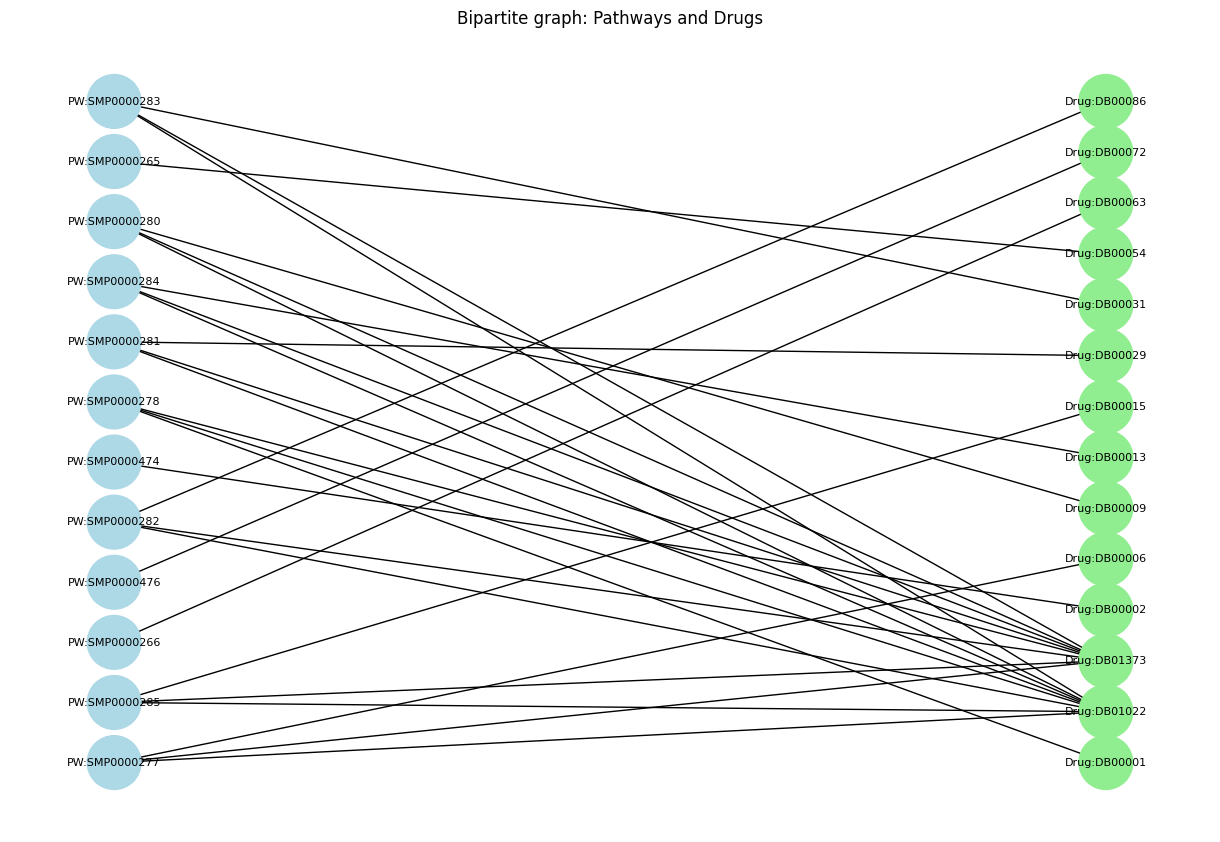

In [10]:
records = []
for drug in drugs:
    pathways_section = drug.get("pathways")
    if pathways_section:
        pathway_data = pathways_section.get("pathway")
        if pathway_data:
            if not isinstance(pathway_data, list):
                pathway_data = [pathway_data]
            for pathway in pathway_data:
                drugs_in_pathway = pathway.get("drugs")
                if drugs_in_pathway:
                    drug_entries = drugs_in_pathway.get("drug")
                    if drug_entries:
                        if not isinstance(drug_entries, list):
                            drug_entries = [drug_entries]
                        for pathway_drug in drug_entries:
                            records.append({
                                "Pathway ID": pathway.get("smpdb-id"),
                                "Pathway Name": pathway.get("name"),
                                "DrugBank ID": pathway_drug.get("drugbank-id"),
                                "Drug Name": pathway_drug.get("name")
                            })

df = pd.DataFrame(records)
print("DataFrame: Pathways and Drugs")
display(df)

B = nx.Graph()

for _, row in df.iterrows():
    pathway_node = f"PW:{row['Pathway ID']}" if row['Pathway ID'] else f"PW:{row['Pathway Name']}"
    drug_node = f"Drug:{row['DrugBank ID']}" if row['DrugBank ID'] else f"Drug:{row['Drug Name']}"
    B.add_node(pathway_node, bipartite=0, label=row["Pathway Name"])
    B.add_node(drug_node, bipartite=1, label=row["Drug Name"])
    B.add_edge(pathway_node, drug_node)

pathway_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
pos = nx.bipartite_layout(B, pathway_nodes)

plt.figure(figsize=(12, 8))
node_colors = ["lightblue" if d["bipartite"] == 0 else "lightgreen" for _, d in B.nodes(data=True)]
nx.draw(B, pos, with_labels=True, node_color=node_colors, node_size=1500, font_size=8)
plt.title("Bipartite graph: Pathways and Drugs")
plt.show()

Task 6) \
For each drug in the database, provide the number of pathways that the drug interacts with
interactions. Present the results in the form of a histogram with appropriately labeled axes. \
Solution: parse data.



DataFrame: Number of Pathways for each Drug


,DrugBank ID,Number of pathways
0,DB00001,1
1,DB00002,1
2,DB00003,0
3,DB00004,0
4,DB00005,0
...,...,...
95,DB00104,0
96,DB00105,0
97,DB00106,0
98,DB00107,0


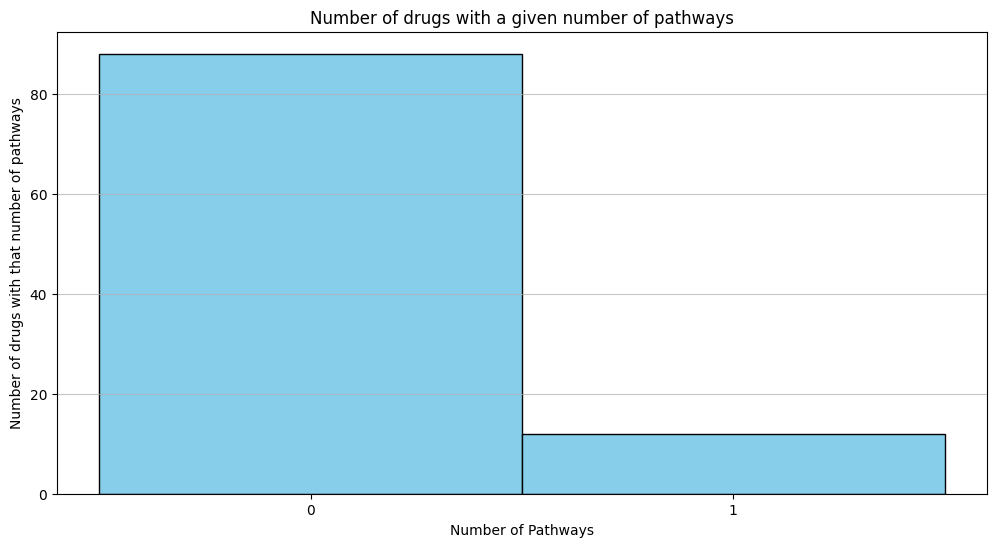

In [11]:
def get_no_pathways(drug):
    pathways = drug.get("pathways")
    if pathways:
        if isinstance(pathways.get("pathway"), list):
            return len(pathways["pathway"])
        elif isinstance(pathways.get("pathway"), dict):
            return 1
    return 0

records = []
for drug in drugs:
    drug_id = get_id(drug)
    no_pathways = get_no_pathways(drug)
    records.append({"DrugBank ID": drug_id, "Number of pathways": no_pathways})

df = pd.DataFrame(records)
print("DataFrame: Number of Pathways for each Drug")
display(df)

plt.figure(figsize=(12, 6))
plt.hist(df["Number of pathways"], bins=range(df["Number of pathways"].max() + 2), color="skyblue", edgecolor="black", align='left')
plt.ylabel("Number of drugs with that number of pathways")
plt.xlabel("Number of Pathways")
plt.xticks(range(df["Number of pathways"].max() + 1))
plt.title("Number of drugs with a given number of pathways")
plt.grid(axis="y", alpha=0.7)
plt.show()

Task 7) \
Create a data frame containing information about the proteins each drug interacts with
they interact. These proteins are the so-called targets. The data frame should contain
at least DrugBank ID of the target, information about an external database (*source*,
e.g. Swiss-Prot), identifier in an external database, polypeptide name, gene name
encoding polypeptide, GenAtlas ID, chromosome number, location
in the cell.


In [12]:
def get_targets(drug):
    targets = drug.get("targets")
    if targets:
        if isinstance(targets.get("target"), list):
            return targets["target"]
        elif isinstance(targets.get("target"), dict):
            return [targets["target"]]
    return []

def get_polypeptides(target):
    polypeptides = target.get("polypeptide")
    if polypeptides:
        if isinstance(polypeptides, list):
            return polypeptides
        elif isinstance(polypeptides, dict):
            return [polypeptides]
    return []

# Tricky, we return the first GenAtlas ID we find
def get_genatlas_id(external_identifiers):
    external_identifiers = external_identifiers.get("external-identifier")
    if not external_identifiers:
        return None
    if isinstance(external_identifiers, dict):
        external_identifiers = [external_identifiers]
    for ext_id in external_identifiers:
        if ext_id.get("resource") == "GenAtlas":
            return ext_id.get("identifier")
    return None

def parse_drug_data(drugs):
    data = []
    for drug in drugs:
        targets = get_targets(drug)

        for target in targets:
            target_id = target.get("id")
            polypeptides = get_polypeptides(target)

            for poly in polypeptides:
                row = {
                    "DrugBank Target ID": target_id,
                    "Source": poly.get("@source"),
                    "External Database ID": poly.get("@id"),
                    "Polypeptide Name": poly.get("name"),
                    "Gene Name": poly.get("gene-name"),
                    "GenAtlas ID": get_genatlas_id(poly.get("external-identifiers")),
                    "Chromosome Location": poly.get("chromosome-location"),
                    "Cellular Location": poly.get("cellular-location"),
                }
                data.append(row)

    return pd.DataFrame(data)

df = parse_drug_data(drugs)
print("DataFrame: Drug Targets")
display(df)


DataFrame: Drug Targets


,DrugBank Target ID,Source,External Database ID,Polypeptide Name,Gene Name,GenAtlas ID,Chromosome Location,Cellular Location
0,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted
...,...,...,...,...,...,...,...,...
247,BE0000844,Swiss-Prot,P30559,Oxytocin receptor,OXTR,OXTR,3,Cell membrane
248,BE0000590,Swiss-Prot,P13612,Integrin alpha-4,ITGA4,ITGA4,2,Membrane
249,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
250,BE0000710,Swiss-Prot,P12314,High affinity immunoglobulin gamma Fc receptor I,FCGR1A,FCGR1A,1,Cell membrane


8) Create a pie chart showing the percentage of targets in various
parts of the cell.

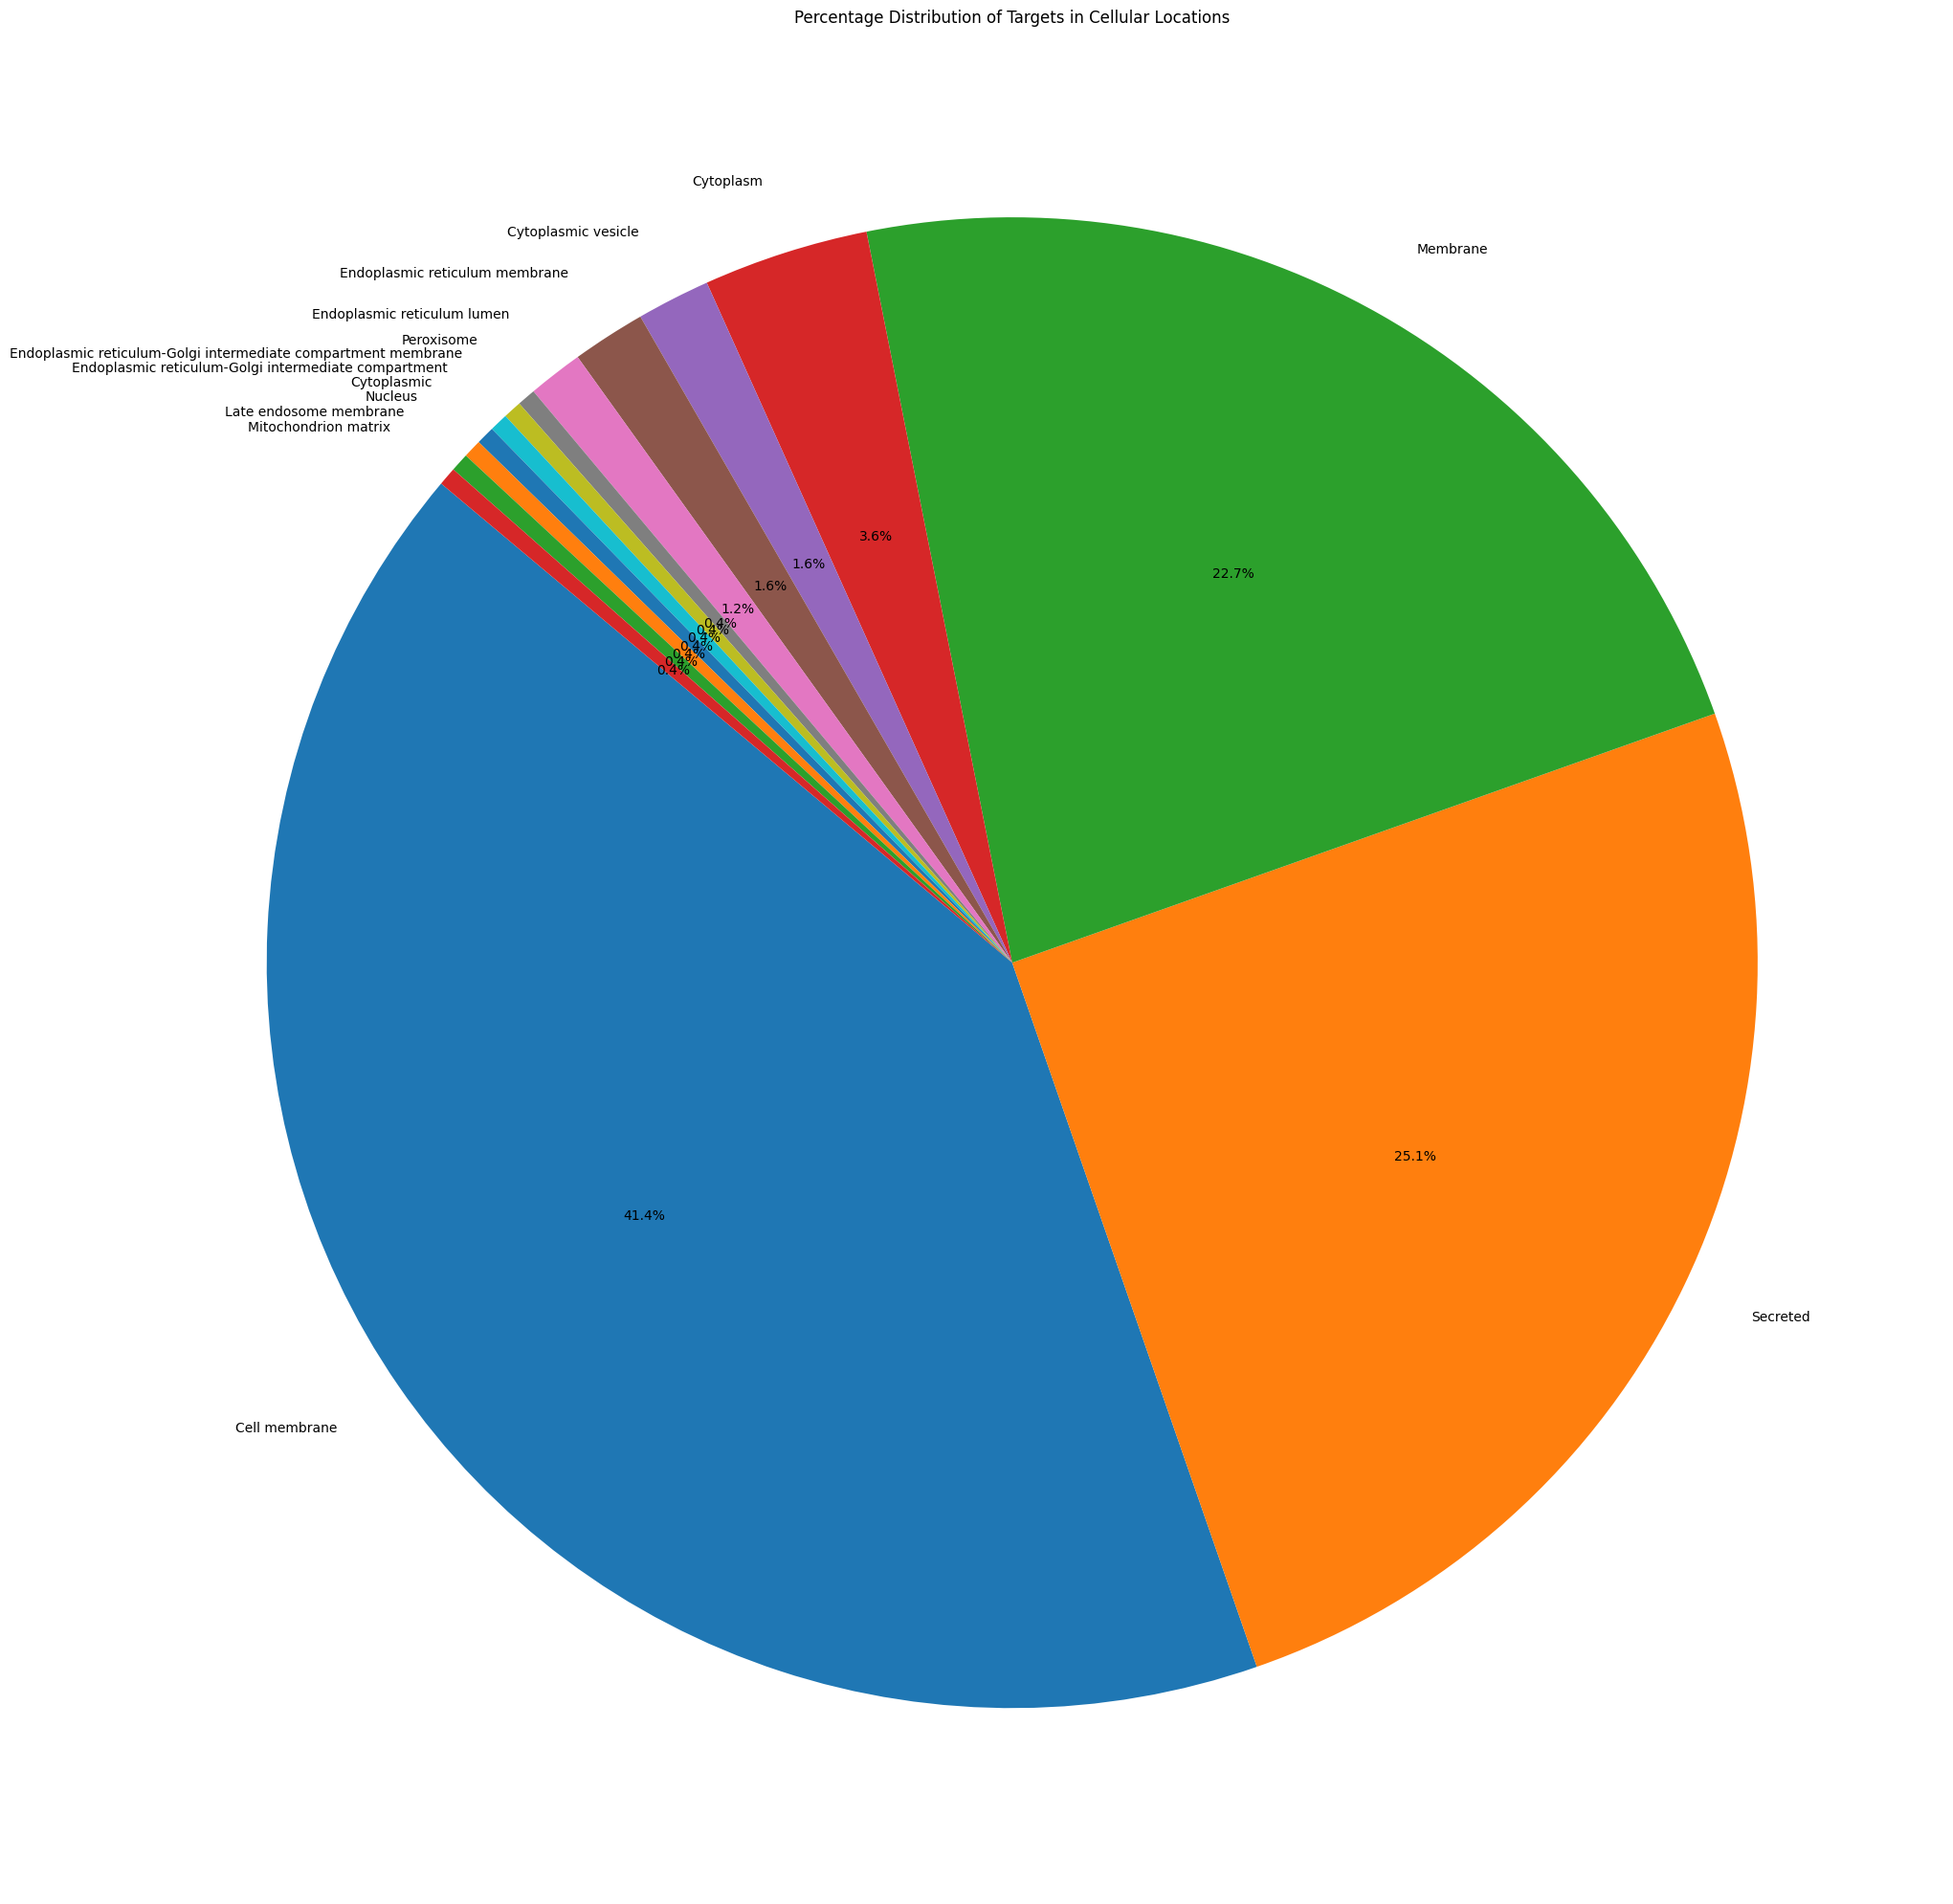

In [13]:
def plot_cellular_location_distribution(df):
    location_counts = df["Cellular Location"].value_counts()
    plt.figure(figsize=(30, 20))
    plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Percentage Distribution of Targets in Cellular Locations")
    plt.tight_layout()
    plt.show()

plot_cellular_location_distribution(df)

9) Create a data frame showing how many drugs have been approved, withdrawn, and how many
is in the experimental phase (*experimental* or *investigational*) and allowed in
animal treatment. Plot this data in a pie chart. Enter the number approved
medicines that have not been recalled.

Number of approved drugs that have not been withdrawn: 89


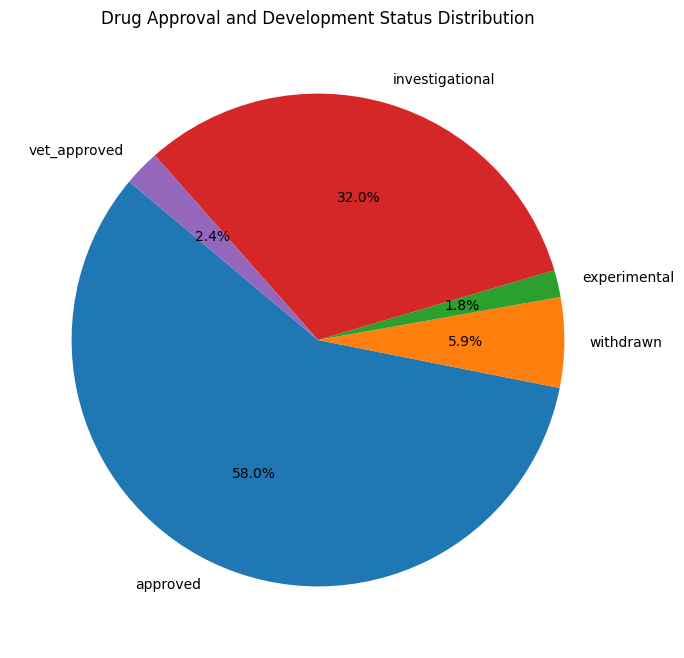

In [14]:
def parse_drug_status(drugs):
    statuses = {"approved": 0, "withdrawn": 0, "experimental": 0, "investigational": 0, "vet_approved": 0}
    approved_not_withdrawn = 0

    for drug in drugs:
        groups = drug.get("groups", {}).get("group", [])
        if isinstance(groups, str):
            groups = [groups]

        has_approved = "approved" in groups
        has_withdrawn = "withdrawn" in groups

        if has_approved:
            statuses["approved"] += 1
            if not has_withdrawn:
                approved_not_withdrawn += 1
        if has_withdrawn:
            statuses["withdrawn"] += 1
        if "experimental" in groups:
            statuses["experimental"] += 1
        if "investigational" in groups:
            statuses["investigational"] += 1
        if "vet_approved" in groups:
            statuses["vet_approved"] += 1

    return statuses, approved_not_withdrawn

def plot_drug_status_pie(statuses):
    plt.figure(figsize=(8, 8))
    plt.pie(statuses.values(), labels=statuses.keys(), autopct='%1.1f%%', startangle=140)
    plt.title("Drug Approval and Development Status Distribution")
    plt.show()

statuses, approved_not_withdrawn = parse_drug_status(drugs)
df = pd.DataFrame(list(statuses.items()))
print("Number of approved drugs that have not been withdrawn:", approved_not_withdrawn)

plot_drug_status_pie(statuses)


10) Create a data frame containing information about potential interactions
this medicine with other medicines.

In [15]:
def parse_drug_interactions(drugs):
    interactions = []
    for drug in drugs:
        drug_id = get_id(drug)
        drug_name = get_name(drug)
        drug_interactions = drug.get("drug-interactions")
        if not drug_interactions:
            continue
        drug_interactions = drug_interactions.get("drug-interaction", [])

        if isinstance(drug_interactions, dict):
            drug_interactions = [drug_interactions]

        for interaction in drug_interactions:
            row = {
                "Drug 1 ID": drug_id,
                "Drug 1 Name": drug_name,
                "Drug 2 ID": interaction.get("drugbank-id"),
                "Drug 2 Name": interaction.get("name"),
                "Interaction Description": interaction.get("description"),
            }
            interactions.append(row)

    return pd.DataFrame(interactions)

df = parse_drug_interactions(drugs)
print("DataFrame: Drug Interactions")
display(df)

DataFrame: Drug Interactions


,Drug 1 ID,Drug 1 Name,Drug 2 ID,Drug 2 Name,Interaction Description
0,DB00001,Lepirudin,DB06605,Apixaban,Apixaban may increase the anticoagulant activi...
1,DB00001,Lepirudin,DB06695,Dabigatran etexilate,Dabigatran etexilate may increase the anticoag...
2,DB00001,Lepirudin,DB01254,Dasatinib,The risk or severity of bleeding and hemorrhag...
3,DB00001,Lepirudin,DB01609,Deferasirox,The risk or severity of gastrointestinal bleed...
4,DB00001,Lepirudin,DB01586,Ursodeoxycholic acid,The risk or severity of bleeding and bruising ...
...,...,...,...,...,...
50683,DB00108,Natalizumab,DB14766,Etrasimod,The risk or severity of immunosuppression can ...
50684,DB00108,Natalizumab,DB15043,Toripalimab,The risk or severity of adverse effects can be...
50685,DB00108,Natalizumab,DB18701,"Chikungunya vaccine (live, attenuated)",The risk or severity of infection can be incre...
50686,DB00108,Natalizumab,DB18705,SARS-CoV-2 virus recombinant spike (S) protein...,The therapeutic efficacy of SARS-CoV-2 virus r...


11) Prepare a graphic presentation of your own idea containing information about
a specific gene or genes, medicinal substances that contain this gene/genes
interact, and pharmaceutical products that contain a given substance
medicinal. The choice regarding whether graphical presentation is implemented for
a specific gene or all genes at once, we leave it to you to decide.
When making your choice, you should take into account the readability and attractiveness of the presentation
graphic.

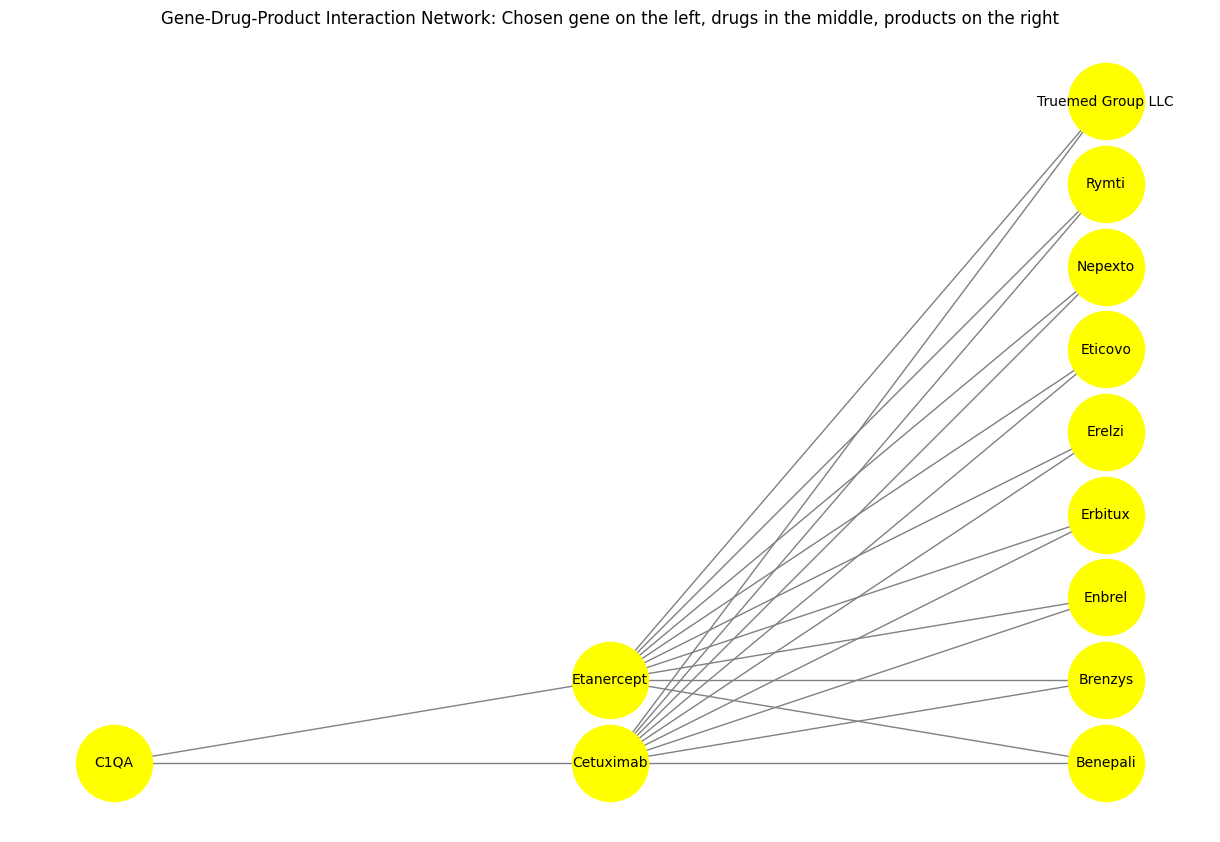

,Gene Name,Drugs,Products
0,F2,"Bivalirudin, Coagulation Factor IX (Recombinan...","Angiomax, Angiomax RTU, Angiox, BeneFIX, Benef..."
1,EGFR,Cetuximab,Erbitux
2,FCGR3B,"Alefacept, Alemtuzumab, Cetuximab, Etanercept,...","Alyglo, Amevive, Asceniv, Benepali, Bivigam, B..."
3,C1QA,"Cetuximab, Etanercept","Benepali, Brenzys, Enbrel, Erbitux, Erelzi, Et..."
4,C1QB,"Cetuximab, Etanercept","Benepali, Brenzys, Enbrel, Erbitux, Erelzi, Et..."
...,...,...,...
132,PDGFRB,Becaplermin,"Regranex, Regranex (becaplermin) 0.01%"
133,PDGFRA,Becaplermin,"Regranex, Regranex (becaplermin) 0.01%"
134,A2M,Becaplermin,"Regranex, Regranex (becaplermin) 0.01%"
135,ITGA4,Natalizumab,Tysabri


In [16]:
def parse_gene_drug_product(drugs):
    gene_data = {}

    for drug in drugs:
        drug_name = get_name(drug)
        targets = get_targets(drug)
        products = drug.get("products")
        if not products:
            continue
        products = products.get("product")
        if isinstance(products, dict):
            products = [products]
        product_names = set(p.get("name") for p in products)

        for target in targets:
            polypeptides = get_polypeptides(target)
            for poly in polypeptides:
                gene_name = poly.get("gene-name")
                if not gene_name:
                    continue

                if gene_name not in gene_data:
                    gene_data[gene_name] = {"Drugs": set(), "Products": set()}

                gene_data[gene_name]["Drugs"].add(drug_name)
                gene_data[gene_name]["Products"].update(product_names)

    data = [{"Gene Name": gene, "Drugs": ", ".join(sorted(info["Drugs"])), "Products": ", ".join(sorted(info["Products"]))} for gene, info in gene_data.items()]
    return pd.DataFrame(data)

def plot_gene_drug_product_graph(df, gene_name):
    G = nx.Graph()

    for _, row in df.iterrows():
        gene = row["Gene Name"]
        if gene == gene_name:
            drugs = row["Drugs"].split(", ")
            products = row["Products"].split(", ")

            for drug in drugs:
                G.add_edge(gene, drug, label="interacts with")
                for product in products:
                    G.add_edge(drug, product, label="contained in")

    pos = {}
    pos[gene_name] = (0, 0)
    for i, drug in enumerate(drugs):
        pos[drug] = (1, i)
    for j, product in enumerate(products):
        pos[product] = (2, j)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color="yellow", edge_color="gray", node_size=3000, font_size=10)
    plt.title("Gene-Drug-Product Interaction Network: Chosen gene on the left, drugs in the middle, products on the right")
    plt.show()

gene_drug_product_df = parse_gene_drug_product(drugs)
plot_gene_drug_product_graph(gene_drug_product_df, "C1QA")
display(gene_drug_product_df)

12) Propose your own analysis and presentation of drug data. You can in this
to obtain additional information from other biomedical and bioinformatics databases
data available online. However, you should make sure that your database allows it
automated data downloading by the program. For example, the GeneCards database
it explicitly prohibits it, which is underlined in red on this page. Sample databases
data are: UniProt (https://www.uniprot.org/), Small Molecule Pathway Database
(https://smpdb.ca/), The Human Protein Atlas (https://www.proteinatlas.org/).

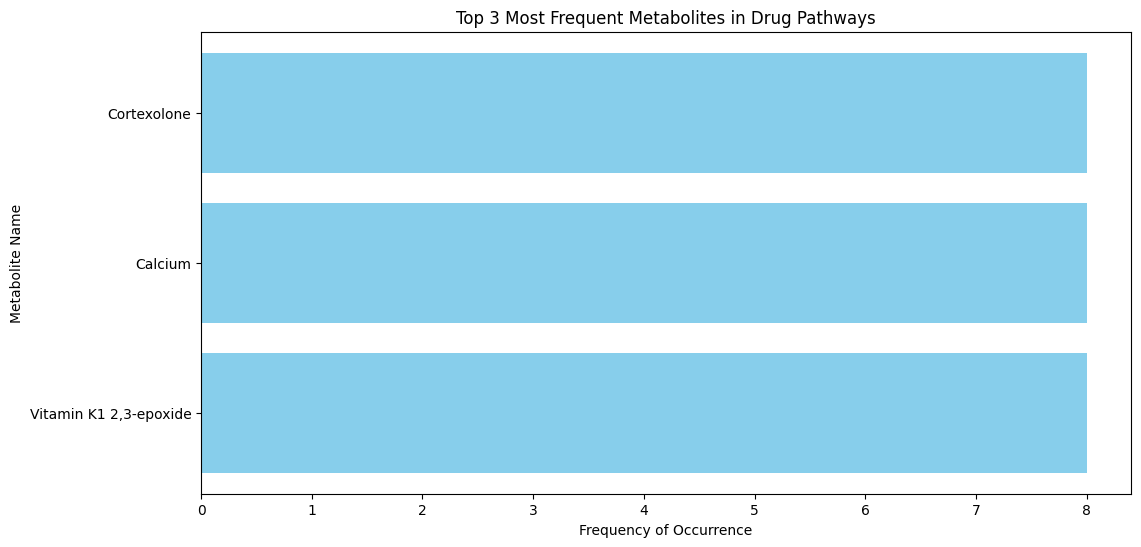

In [22]:
def extract_pathway_ids(drugs):
    pathway_ids = set()
    for drug in drugs:
        pathways = drug.get("pathways")
        if not pathways:
            continue
        pathways = pathways.get("pathway")

        if isinstance(pathways, dict):
            pathways = [pathways]
        for pathway in pathways:
            pathway_ids.add(pathway.get("smpdb-id"))
    return pathway_ids

def load_metabolite_data(folder_path, pathway_ids):
    metabolite_counts = {}
    metabolite_names = {}

    for filename in os.listdir(folder_path):
        if filename.startswith("SMP") and filename.endswith("_metabolites.csv"):
            smpdb_id = filename.split("_")[0]
            if smpdb_id not in pathway_ids:
                continue

            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)

            for _, row in df.iterrows():
                metabolite_id = row.get("Metabolite ID")
                metabolite_name = row.get("Metabolite Name")

                if metabolite_id:
                    metabolite_counts[metabolite_id] = metabolite_counts.get(metabolite_id, 0) + 1
                    metabolite_names[metabolite_id] = metabolite_name
    return metabolite_counts, metabolite_names

def plot_top_metabolites(metabolite_counts, metabolite_names, top_n=3):
    sorted_metabolites = sorted(metabolite_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    metabolite_ids = [item[0] for item in sorted_metabolites]
    counts = [item[1] for item in sorted_metabolites]
    names = [metabolite_names[mid] for mid in metabolite_ids]

    plt.figure(figsize=(12, 6))
    plt.barh(names, counts, color='skyblue')
    plt.xlabel("Frequency of Occurrence")
    plt.ylabel("Metabolite Name")
    plt.title("Top 3 Most Frequent Metabolites in Drug Pathways")
    plt.gca().invert_yaxis()
    plt.show()

pathway_ids = extract_pathway_ids(drugs)
metabolite_counts, metabolite_names = load_metabolite_data("smpdb_metabolites.csv/", pathway_ids)
plot_top_metabolites(metabolite_counts, metabolite_names)
